# How has the NBA changed since 1950?

For this workshop we'll explore NBA data going all the way back to 1950! We'll explore the data and try to answer the question that was proposed to us which is, has the NBA changed since 1950.

First, we'll compare shooting percentages from 1950 & 2017. We'll structure the data we want then we'll visualize the data to see what the data is telling us.

After looking at percentages, we'll try to determine if the College that a player attended affects performance in NBA?

##### Resources:
- [Basketball Data Definitions](https://www.basketball-reference.com/about/glossary.html)

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

#### Import Data

In [3]:
nba = pd.read_csv("../../data/nba_1950/season_stats.csv")

#### Quick feel for the data

In [21]:
line_break = '='*60

# Look at head
print('{}\n{}\n{}\n'.format('HEAD', nba.head(5), line_break))

# Look at tail
print('{}\n{}\n{}\n'.format('TAIL', nba.head(5), line_break))

# Look at info
print('{}\n{}\n{}\n'.format('INFORMATION', nba.info(), line_break))

# Look at describe
print('{}\n{}\n{}\n'.format('DESCRIBE', nba.describe(), line_break))

HEAD
     Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368  ...   
1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435  ...   
2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394  ...   
3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312  ...   
4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308  ...   

     FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 52 columns]

TAIL
     Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN N

# Shooting Percentage

In [22]:
# Use pandas .value_counts() to look at the distribution of TS%
shoot_percentage = nba['TS%'].value_counts()
shoot_percentage.head()

0.500    235
0.000    201
0.521    188
0.533    186
0.530    182
Name: TS%, dtype: int64

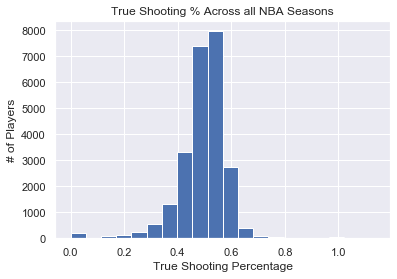

In [23]:
# Use pandas .hist() method to visualize distribution of TS%
nba['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting % Across all NBA Seasons")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

In [26]:
# Prep our data to answer the question asked by grabbing data from the year 1950 & 2017
first_year = nba['Year'].min()
last_year = nba['Year'].max()

# Print years to confirm
print('First year: {}\nLast year: {}'.format(first_year, last_year))

# Create new dataframes with records from specific years
nba_1950 = nba[nba['Year'] == first_year]
nba_2017 = nba[nba['Year'] == last_year]


First year: 1950.0
Last year: 2017.0


pandas.core.frame.DataFrame

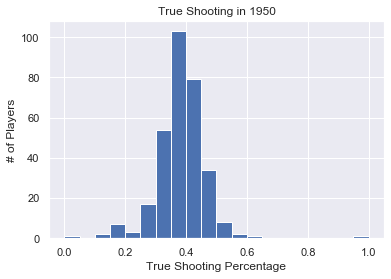

In [27]:
# Histogram of Shooting Percentage in 1950
nba_1950['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting in 1950")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

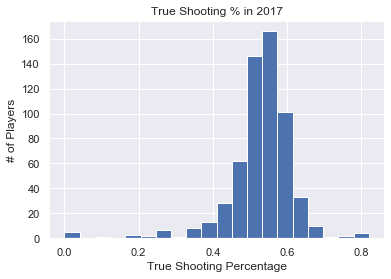

In [28]:
# Histogram of Shooting Percentage in 2017
nba_2017['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting % in 2017")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

### Using only the data from the Histograms for both years... 

### What has happened to the True Shooting Percentage between 1950 and 2017?

In [ ]:
# Provide your short answer here



# Does The College that a player attended affect performance in NBA?

#### Import player data

In [31]:
players = pd.read_csv('../../data/nba_1950/player_data.csv')

In [32]:
top_5_colleges = ['University of Kentucky',
                  'Duke Univeristy',
                  'University of Kansas',
                  'Syracuse University',
                  'University of California, Los Angeles']

In [33]:
# Lets take a look at college column of players
players['college'].value_counts().head(10)

University of Kentucky                   99
University of California, Los Angeles    91
University of North Carolina             87
University of Kansas                     72
Duke University                          71
Indiana University                       60
University of Notre Dame                 56
University of Louisville                 55
St. John's University                    51
University of Arizona                    51
Name: college, dtype: int64

In [34]:
# We'll use Pandas .isin() method to check college column against
in_top_5_colleges = players['college'].isin(top_5_colleges)

In [35]:
# index entire players df by "in_top_5"
players_in_top_5 = players[in_top_5_colleges]['name']
players_in_top_5.head(20)

2      Kareem Abdul-Jabbar
19            Jordan Adams
22          Rafael Addison
23             Bam Adebayo
26           Arron Afflalo
39            Cole Aldrich
42         Cliff Alexander
55            Lucius Allen
63          Darrell Allums
81          Derek Anderson
91           Kyle Anderson
102           Ike Anigbogu
107        Carmelo Anthony
120           Trevor Ariza
134         Darrell Arthur
157       Kelenna Azubuike
171            Toby Bailey
182             Lonzo Ball
195           Cliff Barker
199          Don Barksdale
Name: name, dtype: object

In [36]:
# We'll use Pandas .isin() method to check players column in nba 
# against the players_in_top_5 series we just constructed
in_top_colleges = nba['Player'].isin(players_in_top_5)

In [37]:
# We will divide all of the rows of nba into 2 dataframes, 
# those players who attended the top colleges, and those who did not
top_college = nba[in_top_colleges]
bottom_college = nba[~in_top_colleges]

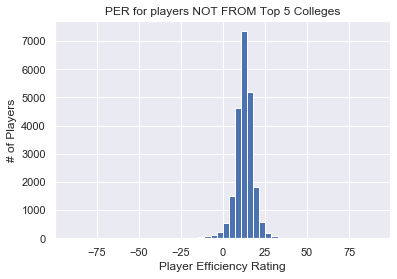

In [38]:
# Plot the Players NOT FROM Top 5
bottom_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players NOT FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

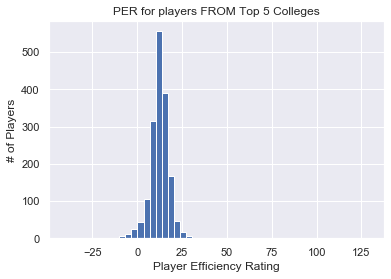

In [39]:
# Plot the Players FROM Top 5
top_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

### What conclusions can we draw about these 2 groups?

In [ ]:
# Provide your short answer here
# What could we do better? ...